<a id="0"></a> <br>
 # Table of Contents  
1. [Data set: Analyze results from all matches: 1872-2022](#1)   
    1. [Remove rows with missing data](#1A) 
1. [Data set: Analyze results from FIFA team rankings: 1992-2022](#2) 
1. [Data set: Data for World Cup Groups: 2022](#3)
1. [Data set: Data from FiveThirtyEight Soccer Power Index(SPI): 2022](#4) 
    1. [Match country names across the 3 data frames](#4A)
1. [Final Data set: Merge the 3 data sets](#5) 
    1. [Merge team rankings with the SPI](#5A)
    1. [Merge match results with team rankings](#5B)
1. [Create the features](#6)     
    1. [Evaluation Metrics for Training set](#9)     
    1. [Evaluation Metrics for Validation set](#10)     
    1. [First Submission](#11) 
1. [Selecting Models](#12)       
    1. [Helper Functions to Try New Models](#13)      
    1. [Split to the Small Data for Evaluating Models Fast](#14)     
    1. [ML Models](#15)         
        1. [XGBoost](#16)             
            1. [Training](#17)

In [70]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.express as px
from IPython.display import Markdown as md
from IPython.display import display, Image, SVG, Math, YouTubeVideo
from datetime import datetime
import warnings

<a id="1"></a> 
# 1. Analyze results from all matches: 1872-2022

In [3]:
all_results_df =  pd.read_csv("../data/kaggle-1872-2022-results.csv")

all_results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [4]:
all_results_df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
44055,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False
44056,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False
44057,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False
44058,2022-09-27,Greece,Northern Ireland,3.0,1.0,UEFA Nations League,Athens,Greece,False
44059,2022-09-30,Fiji,Solomon Islands,NaN,NaN,MSG Prime Minister's Cup,Luganville,Vanuatu,True


In [5]:
all_results_df.dtypes

date           object
home_team      object
away_team      object
home_score    float64
away_score    float64
tournament     object
city           object
country        object
neutral          bool
dtype: object

In [6]:
all_results_df.shape

(44060, 9)

In [7]:
all_results_df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    1
away_score    1
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [8]:
all_results_df[all_results_df.isnull().any(axis=1)]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
44059,2022-09-30,Fiji,Solomon Islands,NaN,NaN,MSG Prime Minister's Cup,Luganville,Vanuatu,True


<a id="1A"></a> 
## A. Remove rows with missing data


In [9]:
all_results_df = all_results_df[all_results_df['home_score'].notna()]

In [10]:
all_results_df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [11]:
all_results_df.shape

(44059, 9)

In [12]:
all_results_df["date"] = pd.to_datetime(all_results_df["date"])

<a id="2"></a> 
# 2. Analyze results from FIFA team rankings: 1992-2022


Rankings scraped using python BeautifulSoup package from [FIFA Men's Rankings website](https://www.fifa.com/fifa-world-ranking/men?dateId=id13792).

In [13]:
team_rankings_df = pd.read_csv('../data/fifa-team-ranks-1992-2022.csv')
team_rankings_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.0,0.0,0,UEFA,1992-12-31
1,96,Syria,SYR,11.0,0.0,0,AFC,1992-12-31
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,1992-12-31
3,99,Latvia,LVA,10.0,0.0,0,UEFA,1992-12-31
4,100,Burundi,BDI,10.0,0.0,0,CAF,1992-12-31


In [14]:
team_rankings_df.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
63911,74,El Salvador,SLV,1330.51,1333.48,3,CONCACAF,2022-10-06
63912,75,Oman,OMA,1320.29,1323.03,0,AFC,2022-10-06
63913,76,Israel,ISR,1316.55,1316.35,0,UEFA,2022-10-06
63914,78,Georgia,GEO,1307.34,1296.46,-4,UEFA,2022-10-06
63915,211,San Marino,SMR,762.22,763.82,0,UEFA,2022-10-06


In [15]:
team_rankings_df.dtypes

rank                 int64
country_full        object
country_abrv        object
total_points       float64
previous_points    float64
rank_change          int64
confederation       object
rank_date           object
dtype: object

In [16]:
team_rankings_df.shape

(63916, 8)

In [17]:
team_rankings_df.isnull().sum()

rank               0
country_full       0
country_abrv       0
total_points       0
previous_points    0
rank_change        0
confederation      0
rank_date          0
dtype: int64

In [18]:
# we will use the date as the primary index to match the match results dataframe
team_rankings_df["rank_date"] = pd.to_datetime(team_rankings_df["rank_date"])

In [21]:
team_rankings_df.sort_values(by='rank_date').head(300)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.0,0.0,0,UEFA,1992-12-31
95,74,Madagascar,MAD,18.0,0.0,0,CAF,1992-12-31
96,2,Italy,ITA,57.0,0.0,0,UEFA,1992-12-31
97,3,Brazil,BRA,56.0,0.0,0,CONMEBOL,1992-12-31
98,4,Sweden,SWE,56.0,0.0,0,UEFA,1992-12-31
...,...,...,...,...,...,...,...,...
199,151,Cuba,CUB,1.0,1.0,7,CONCACAF,1993-08-08
200,78,Syria,SYR,21.0,11.0,-18,AFC,1993-08-08
201,136,St. Lucia,LCA,4.0,6.0,18,CONCACAF,1993-08-08
202,115,Suriname,SUR,9.0,12.0,20,CONCACAF,1993-08-08


In [22]:
# eyeball the data
team_rankings_df.loc[team_rankings_df['country_full'] == 'Ghana']

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
132,39,Ghana,GHA,34.00,0.00,0,CAF,1992-12-31
290,48,Ghana,GHA,34.00,34.00,9,CAF,1993-08-08
443,42,Ghana,GHA,37.00,34.00,-6,CAF,1993-09-23
472,40,Ghana,GHA,37.00,37.00,-2,CAF,1993-10-22
743,41,Ghana,GHA,37.00,37.00,1,CAF,1993-11-19
...,...,...,...,...,...,...,...,...
62875,61,Ghana,GHA,1381.45,1428.97,9,CAF,2022-02-10
63261,60,Ghana,GHA,1387.36,1381.45,-1,CAF,2022-03-31
63303,60,Ghana,GHA,1389.68,1387.36,0,CAF,2022-06-23
63687,60,Ghana,GHA,1393.47,1389.68,0,CAF,2022-08-25


<div class="alert alert-block alert-info"> <b>Note:</b> We will truncate the results data to start from 1992 so we have parity with the rankings data. </div>

In [23]:
team_rankings_df = team_rankings_df[(team_rankings_df["rank_date"] >= "1992-12-31")].reset_index(drop=True)

In [24]:
all_results_df = all_results_df[(all_results_df["date"] >= "1992-12-31")].reset_index(drop=True)
all_results_df.sort_values(by='date').head(300)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1993-01-01,Ghana,Mali,1.0,1.0,Friendly,Libreville,Gabon,True
1,1993-01-02,Gabon,Burkina Faso,1.0,1.0,Friendly,Libreville,Gabon,False
2,1993-01-02,Kuwait,Lebanon,2.0,0.0,Friendly,Kuwait City,Kuwait,False
3,1993-01-03,Burkina Faso,Mali,1.0,0.0,Friendly,Libreville,Gabon,True
4,1993-01-03,Gabon,Ghana,2.0,3.0,Friendly,Libreville,Gabon,False
...,...,...,...,...,...,...,...,...,...
293,1993-05-07,Bangladesh,Sri Lanka,3.0,0.0,FIFA World Cup qualification,Dubai,United Arab Emirates,True
294,1993-05-07,Hong Kong,Bahrain,2.0,1.0,FIFA World Cup qualification,Beirut,Lebanon,True
297,1993-05-08,United States,Colombia,1.0,2.0,Friendly,Miami,United States,False
298,1993-05-09,Bahrain,South Korea,0.0,0.0,FIFA World Cup qualification,Beirut,Lebanon,True


In [27]:
#rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()
#print(rank.shape)
#print(rank.dtypes)


In [28]:
#print(rank["country_full"].value_counts().sort_index().to_string())

<a id="3"></a> 
# 3. Data for World Cup Groups: 2022

In [29]:
world_cup_groups_df = pd.read_csv("../data/qatar-2022-groups.csv")

world_cup_groups_df.head()

,Group,Flag_Image,Team,Country_Name_Short,First match against,Second match against,Third match against
0,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Qatar,QAT,Ecuador,Senegal,Netherlands
1,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Ecuador,ECU,Qatar,Netherlands,Senegal
2,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Senegal,SEN,Netherlands,Qatar,Ecuador
3,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Netherlands,NED,Senegal,Ecuador,Qatar
4,B,https://cloudinary.fifa.com/api/v3/picture/fla...,England,ENG,Iran,USA,Wales


In [30]:
world_cup_groups_df.columns

Index(['Group', 'Flag_Image', 'Team', 'Country_Name_Short',
       'First match against', 'Second match against', 'Third match against'],
      dtype='object')

In [31]:
world_cup_groups_df.shape

(32, 7)

<a id="4"></a> 
# 4. Data set: Data from FiveThirtyEight Soccer Power Index(SPI): 2022

SPI data from [fivethirtheight.com website](https://fivethirtyeight.com/features/how-our-2022-world-cup-predictions-work/).

In [52]:
spi_ratings_df = pd.read_csv("../data/fivethirtyeight-spi-index.csv")

spi_ratings_df.head()

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp
0,2022-11-20 18:01:09 UTC,Brazil,G,93.54699,3.22213,0.29634,2.11717,0.59686,0.28597,4.46233,...,0.72109,0.19069,0.06774,0.02048,0.91178,0.68446,0.46037,0.32259,0.21689,2022-11-20 18:02:33 UTC
1,2022-11-20 18:01:09 UTC,Spain,E,89.50604,2.80203,0.38627,1.76786,0.69627,0.53587,2.89908,...,0.47131,0.33878,0.15173,0.03818,0.81009,0.56018,0.30576,0.19005,0.10784,2022-11-20 18:02:33 UTC
2,2022-11-20 18:01:09 UTC,France,D,87.70516,2.77362,0.47923,1.78685,0.73514,0.47801,2.97987,...,0.55701,0.27156,0.12059,0.05084,0.82857,0.54091,0.32990,0.17365,0.08682,2022-11-20 18:02:33 UTC
3,2022-11-20 18:01:09 UTC,Argentina,C,87.20776,2.62755,0.43170,1.83665,0.73167,0.43168,3.17458,...,0.59650,0.24498,0.11228,0.04624,0.84148,0.53055,0.32701,0.15601,0.08380,2022-11-20 18:02:33 UTC
4,2022-11-20 18:01:09 UTC,Portugal,H,87.77456,2.78861,0.48293,1.74272,0.74756,0.50972,2.80294,...,0.53465,0.27828,0.13315,0.05392,0.81293,0.46101,0.26312,0.15374,0.07754,2022-11-20 18:02:33 UTC


<a id="4A"></a> 
## A. Match country names across the 4 data frames

In [34]:
np.array(sorted(world_cup_groups_df["Team"].unique()))

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon',
       'Canada', 'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England',
       'France', 'Germany', 'Ghana', 'Iran', 'Japan', 'Korea Republic',
       'Mexico', 'Morocco', 'Netherlands', 'Poland', 'Portugal', 'Qatar',
       'Saudi Arabia', 'Senegal', 'Serbia', 'Spain', 'Switzerland',
       'Tunisia', 'USA', 'Uruguay', 'Wales'], dtype='<U14')

In [35]:
np.array(sorted(all_results_df["home_team"].unique()))

array(['Abkhazia', 'Afghanistan', 'Albania', 'Alderney', 'Algeria',
       'American Samoa', 'Andalusia', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Arameans Suryoye', 'Argentina', 'Armenia',
       'Artsakh', 'Aruba', 'Australia', 'Austria', 'Aymara', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barawa', 'Barbados',
       'Basque Country', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Biafra', 'Bolivia', 'Bonaire',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brittany', 'Brunei',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Canary Islands', 'Cape Verde',
       'Cascadia', 'Catalonia', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chagos Islands', 'Chameria',
       'Chile', 'China PR', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Corsica', 'Costa Rica', 'County of Nice',
       'Croatia', 'Cub

In [36]:
np.array(sorted(team_rankings_df["country_full"].unique()))

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde Islands', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China PR',
       'Chinese Taipei', 'Colombia', 'Comoros', 'Congo', 'Congo DR',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao',
       'Curaçao', 'Cyprus', 'Czech Republic', 'Czechoslovakia',
       "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equato

In [41]:
np.array(sorted(spi_ratings_df["team"].unique()))

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon',
       'Canada', 'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England',
       'France', 'Germany', 'Ghana', 'Iran', 'Japan', 'Mexico', 'Morocco',
       'Netherlands', 'Poland', 'Portugal', 'Qatar', 'Saudi Arabia',
       'Senegal', 'Serbia', 'South Korea', 'Spain', 'Switzerland',
       'Tunisia', 'USA', 'Uruguay', 'Wales'], dtype='<U12')

In [42]:
# correct the county name for 2 countries
world_cup_groups_df = world_cup_groups_df.replace({"Korea Republic" : "South Korea", "USA": "United States"})
team_rankings_df = team_rankings_df.replace({"Korea Republic" : "South Korea", "USA": "United States"})
spi_ratings_df = spi_ratings_df.replace({"Korea Republic" : "South Korea", "USA": "United States"})

In [43]:
world_cup_groups_df = world_cup_groups_df.set_index('Team')
world_cup_groups_df.head()

,Group,Flag_Image,Country_Name_Short,First match against,Second match against,Third match against
Team,,,,,,
Qatar,A,https://cloudinary.fifa.com/api/v3/picture/fla...,QAT,Ecuador,Senegal,Netherlands
Ecuador,A,https://cloudinary.fifa.com/api/v3/picture/fla...,ECU,Qatar,Netherlands,Senegal
Senegal,A,https://cloudinary.fifa.com/api/v3/picture/fla...,SEN,Netherlands,Qatar,Ecuador
Netherlands,A,https://cloudinary.fifa.com/api/v3/picture/fla...,NED,Senegal,Ecuador,Qatar
England,B,https://cloudinary.fifa.com/api/v3/picture/fla...,ENG,Iran,United States,Wales


In [45]:
np.array(sorted(spi_ratings_df["team"].unique()))

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon',
       'Canada', 'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England',
       'France', 'Germany', 'Ghana', 'Iran', 'Japan', 'Mexico', 'Morocco',
       'Netherlands', 'Poland', 'Portugal', 'Qatar', 'Saudi Arabia',
       'Senegal', 'Serbia', 'South Korea', 'Spain', 'Switzerland',
       'Tunisia', 'United States', 'Uruguay', 'Wales'], dtype='<U13')

<a id="5"></a> 
# 5. Final Data set: Merge the 3 data sets

<a id="5A"></a> 
## A. Merge team rankings with the SPI

In [49]:
# # index SPI by country 
# spi_ratings_df = spi_ratings_df.set_index('team')
# spi_ratings_df.head()

In [53]:
# Remove duplicates so we only ove the SPI value for each of the world cup's 32 teams
spi_ratings_df = spi_ratings_df[['team','spi']].copy()

print(spi_ratings_df.shape)

spi_ratings_df = spi_ratings_df.drop_duplicates(subset='team', keep="first")

print(spi_ratings_df.shape)

spi_ratings_df = spi_ratings_df.set_index('team')

spi_ratings_df.head()

(64, 2)
(32, 2)


,spi
team,
Brazil,93.54699
Spain,89.50604
France,87.70516
Argentina,87.20776
Portugal,87.77456


In [55]:
# get the SPI value of each team into the rankings dataframe
print(team_rankings_df.columns)
print(team_rankings_df.shape)

team_rankings_df = pd.merge(team_rankings_df, spi_ratings_df, left_on=['country_full'], 
                           right_on=['team'], how='left')
print(team_rankings_df.columns)
print(team_rankings_df.shape)

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'confederation', 'rank_date'],
      dtype='object')
(63916, 8)
Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'confederation', 'rank_date', 'spi'],
      dtype='object')
(63916, 9)


In [56]:
team_rankings_df.duplicated(['rank_date','country_full']).tail()

63911    False
63912    False
63913    False
63914    False
63915    False
dtype: bool

In [59]:
team_rankings_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,spi
0,1,Germany,GER,57.0,0.0,0,UEFA,1992-12-31,88.7737
1,96,Syria,SYR,11.0,0.0,0,AFC,1992-12-31,NaN
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,1992-12-31,NaN
3,99,Latvia,LVA,10.0,0.0,0,UEFA,1992-12-31,NaN
4,100,Burundi,BDI,10.0,0.0,0,CAF,1992-12-31,NaN


In [58]:
team_rankings_df.isnull().sum()

rank                   0
country_full           0
country_abrv           0
total_points           0
previous_points        0
rank_change            0
confederation          0
rank_date              0
spi                54399
dtype: int64

The countries not in the world cup with not have an SPI value

<a id="5B"></a> 
## B. Merge match results with team rankings

We are merging on date, but since the rankings date may not be same as the match date, we use merge_asof to get nearest date.

In [61]:
print(all_results_df.shape)
print(team_rankings_df.shape)
merged_df = pd.merge_asof(all_results_df, team_rankings_df, 
                           left_on="date", 
                           right_on="rank_date",  left_by="home_team", right_by="country_full")
print(merged_df.shape)
merged_df.head()
merged_df = pd.merge_asof(merged_df, team_rankings_df, 
                           left_on="date", 
                           right_on="rank_date",  left_by="away_team", right_by="country_full", suffixes=('_home', '_away'))
print(merged_df.shape)
merged_df.head()

(26361, 9)
(63916, 9)
(26361, 18)
(26361, 27)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_home,...,spi_home,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,confederation_away,rank_date_away,spi_away
0,1993-01-01,Ghana,Mali,1.0,1.0,Friendly,Libreville,Gabon,True,39.0,...,58.62702,69.0,Mali,MLI,22.0,0.0,0.0,CAF,1992-12-31,NaN
1,1993-01-02,Gabon,Burkina Faso,1.0,1.0,Friendly,Libreville,Gabon,False,55.0,...,NaN,97.0,Burkina Faso,BFA,11.0,0.0,0.0,CAF,1992-12-31,NaN
2,1993-01-02,Kuwait,Lebanon,2.0,0.0,Friendly,Kuwait City,Kuwait,False,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,1993-01-03,Burkina Faso,Mali,1.0,0.0,Friendly,Libreville,Gabon,True,97.0,...,NaN,69.0,Mali,MLI,22.0,0.0,0.0,CAF,1992-12-31,NaN
4,1993-01-03,Gabon,Ghana,2.0,3.0,Friendly,Libreville,Gabon,False,55.0,...,NaN,39.0,Ghana,GHA,34.0,0.0,0.0,CAF,1992-12-31,58.62702


In [ ]:
# print(all_results_df.shape)
# print(team_rankings_df.shape)
# df1 = all_results_df.merge(team_rankings_df, 
#                            left_on=['date', 'home_team'], 
#                            right_on=['rank_date', 'country_full'], how='left')
# print(df1.shape)
# df1 = df1.merge(team_rankings_df, 
#                 left_on=['date', 'away_team'], 
#                 right_on=['rank_date', 'country_full'], suffixes=('_home', '_away'), how='left') 
# print(df1.shape)
# df1.columns

In [62]:
pd.set_option('display.max_colwidth', None)
merged_df[merged_df.isna().any(axis=1)]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_home,...,spi_home,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,confederation_away,rank_date_away,spi_away
0,1993-01-01,Ghana,Mali,1.0,1.0,Friendly,Libreville,Gabon,True,39.0,...,58.62702,69.0,Mali,MLI,22.00,0.00,0.0,CAF,1992-12-31,NaN
1,1993-01-02,Gabon,Burkina Faso,1.0,1.0,Friendly,Libreville,Gabon,False,55.0,...,NaN,97.0,Burkina Faso,BFA,11.00,0.00,0.0,CAF,1992-12-31,NaN
2,1993-01-02,Kuwait,Lebanon,2.0,0.0,Friendly,Kuwait City,Kuwait,False,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,1993-01-03,Burkina Faso,Mali,1.0,0.0,Friendly,Libreville,Gabon,True,97.0,...,NaN,69.0,Mali,MLI,22.00,0.00,0.0,CAF,1992-12-31,NaN
4,1993-01-03,Gabon,Ghana,2.0,3.0,Friendly,Libreville,Gabon,False,55.0,...,NaN,39.0,Ghana,GHA,34.00,0.00,0.0,CAF,1992-12-31,58.62702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26356,2022-09-27,Albania,Iceland,1.0,1.0,UEFA Nations League,Tirana,Albania,False,66.0,...,NaN,63.0,Iceland,ISL,1379.61,1379.61,0.0,UEFA,2022-08-25,NaN
26357,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False,36.0,...,NaN,25.0,Serbia,SRB,1549.53,1549.53,0.0,UEFA,2022-08-25,75.83904
26358,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False,20.0,...,NaN,65.0,Slovenia,SVN,1372.48,1372.48,0.0,UEFA,2022-08-25,NaN
26359,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False,106.0,...,NaN,108.0,Cyprus,CYP,1180.52,1180.52,1.0,UEFA,2022-08-25,NaN


In [63]:
merged_df.isna().sum()

date                        0
home_team                   0
away_team                   0
home_score                  0
away_score                  0
tournament                  0
city                        0
country                     0
neutral                     0
rank_home                2308
country_full_home        2308
country_abrv_home        2308
total_points_home        2308
previous_points_home     2308
rank_change_home         2308
confederation_home       2308
rank_date_home           2308
spi_home                20532
rank_away                2660
country_full_away        2660
country_abrv_away        2660
total_points_away        2660
previous_points_away     2660
rank_change_away         2660
confederation_away       2660
rank_date_away           2660
spi_away                21295
dtype: int64

In [64]:
merged_df = merged_df.dropna()
merged_df = merged_df.reset_index(drop=True)

In [65]:
merged_df.isna().sum()

date                    0
home_team               0
away_team               0
home_score              0
away_score              0
tournament              0
city                    0
country                 0
neutral                 0
rank_home               0
country_full_home       0
country_abrv_home       0
total_points_home       0
previous_points_home    0
rank_change_home        0
confederation_home      0
rank_date_home          0
spi_home                0
rank_away               0
country_full_away       0
country_abrv_away       0
total_points_away       0
previous_points_away    0
rank_change_away        0
confederation_away      0
rank_date_away          0
spi_away                0
dtype: int64

In [66]:
merged_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_home,...,spi_home,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,confederation_away,rank_date_away,spi_away
0,1993-01-23,Japan,Switzerland,1.0,1.0,Friendly,Hong Kong,Hong Kong,True,66.0,...,71.43695,12.0,Switzerland,SUI,51.0,0.0,0.0,UEFA,1992-12-31,77.64665
1,1993-01-27,Spain,Mexico,1.0,1.0,Friendly,Las Palmas,Spain,False,15.0,...,89.50604,25.0,Mexico,MEX,43.0,0.0,0.0,CONCACAF,1992-12-31,74.29647
2,1993-02-18,Argentina,Brazil,1.0,1.0,Friendly,Buenos Aires,Argentina,False,10.0,...,87.20776,3.0,Brazil,BRA,56.0,0.0,0.0,CONMEBOL,1992-12-31,93.54699
3,1993-02-24,Argentina,Denmark,1.0,1.0,CONMEBOL–UEFA Cup of Champions,Mar del Plata,Argentina,False,10.0,...,87.20776,9.0,Denmark,DEN,52.0,0.0,0.0,UEFA,1992-12-31,80.01595
4,1993-02-28,Morocco,Tunisia,0.0,0.0,FIFA World Cup qualification,Casablanca,Morocco,False,41.0,...,75.62263,38.0,Tunisia,TUN,35.0,0.0,0.0,CAF,1992-12-31,65.85461


In [68]:
merged_df.shape

(1746, 27)

<AxesSubplot:>

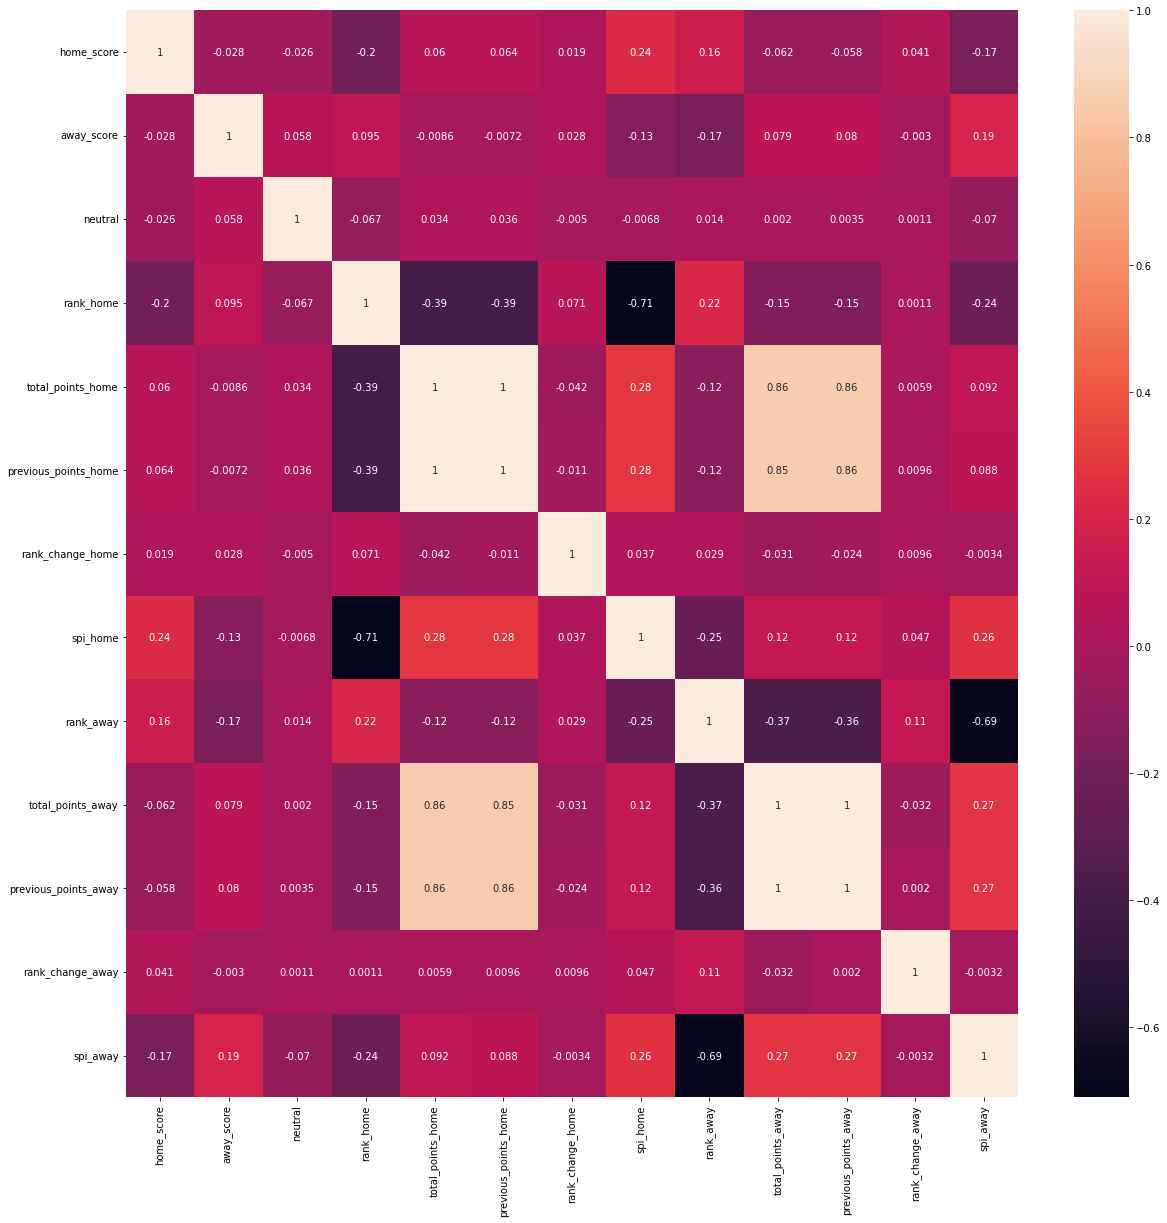

In [71]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
corr1 = merged_df.corr()
corr1
sns.heatmap(corr1,annot=True)

SPI has a strong corelation with the teams score. Its stronger than just the rank of the team.

<a id="6"></a> 
# 6. Create the features

In [74]:
merged_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_home',
       'country_full_home', 'country_abrv_home', 'total_points_home',
       'previous_points_home', 'rank_change_home', 'confederation_home',
       'rank_date_home', 'spi_home', 'rank_away', 'country_full_away',
       'country_abrv_away', 'total_points_away', 'previous_points_away',
       'rank_change_away', 'confederation_away', 'rank_date_away', 'spi_away'],
      dtype='object')

In [75]:
merged_df['rank_difference'] = merged_df['rank_home'] - merged_df['rank_away']
merged_df['average_rank'] = (merged_df['rank_home'] + merged_df['rank_away'])/2
merged_df['point_difference'] = merged_df['total_points_home'] - merged_df['total_points_away']
merged_df['score_difference'] = merged_df['home_score'] - merged_df['away_score']
merged_df['winner'] = merged_df['score_difference'] > 0 
merged_df['is_competitive'] = merged_df['tournament'] != 'Friendly'

In [77]:
merged_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_home',
       'country_full_home', 'country_abrv_home', 'total_points_home',
       'previous_points_home', 'rank_change_home', 'confederation_home',
       'rank_date_home', 'spi_home', 'rank_away', 'country_full_away',
       'country_abrv_away', 'total_points_away', 'previous_points_away',
       'rank_change_away', 'confederation_away', 'rank_date_away', 'spi_away',
       'rank_difference', 'average_rank', 'point_difference',
       'score_difference', 'winner', 'is_competitive'],
      dtype='object')

In [79]:
merged_df.head(77)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_home,...,rank_change_away,confederation_away,rank_date_away,spi_away,rank_difference,average_rank,point_difference,score_difference,winner,is_competitive
0,1993-01-23,Japan,Switzerland,1.0,1.0,Friendly,Hong Kong,Hong Kong,True,66.0,...,0.0,UEFA,1992-12-31,77.64665,54.0,39.0,-29.0,0.0,False,False
1,1993-01-27,Spain,Mexico,1.0,1.0,Friendly,Las Palmas,Spain,False,15.0,...,0.0,CONCACAF,1992-12-31,74.29647,-10.0,20.0,6.0,0.0,False,False
2,1993-02-18,Argentina,Brazil,1.0,1.0,Friendly,Buenos Aires,Argentina,False,10.0,...,0.0,CONMEBOL,1992-12-31,93.54699,7.0,6.5,-5.0,0.0,False,False
3,1993-02-24,Argentina,Denmark,1.0,1.0,CONMEBOL–UEFA Cup of Champions,Mar del Plata,Argentina,False,10.0,...,0.0,UEFA,1992-12-31,80.01595,1.0,9.5,-1.0,0.0,False,True
4,1993-02-28,Morocco,Tunisia,0.0,0.0,FIFA World Cup qualification,Casablanca,Morocco,False,41.0,...,0.0,CAF,1992-12-31,65.85461,3.0,39.5,-3.0,0.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1994-04-13,Poland,Saudi Arabia,1.0,0.0,Friendly,Cannes,France,True,24.0,...,0.0,AFC,1994-03-15,56.86592,-12.0,30.0,6.0,1.0,True,False
73,1994-04-18,Tunisia,Saudi Arabia,2.0,0.0,Friendly,Tunis,Tunisia,False,32.0,...,0.0,AFC,1994-03-15,56.86592,-4.0,34.0,2.0,2.0,True,False
74,1994-04-20,Argentina,Morocco,3.0,1.0,Friendly,Salta,Argentina,False,10.0,...,-3.0,CAF,1994-04-19,75.62263,-16.0,18.0,10.0,2.0,True,False
75,1994-05-01,South Korea,Cameroon,2.0,2.0,Friendly,Seoul,South Korea,False,40.0,...,1.0,CAF,1994-04-19,64.15924,13.0,33.5,-8.0,0.0,False,False


In [ ]:
# df['wc_participant'] = df['home_team'] * df['home_team'].isin(world_cup.index.tolist())
# df['wc_participant'] = df['wc_participant'].replace({'':'Other'})
# df = df.join(pd.get_dummies(df['wc_participant']))

In [ ]:
#spi1.loc[spi1['team'] == 'Ghana']

In [ ]:
# Creating the DataFrame of left side
left = pd.DataFrame({
   
    "time": [pd.Timestamp("2020-03-25 13:30:00.023"),
             pd.Timestamp("2020-03-25 13:30:00.023"),
             pd.Timestamp("2020-03-25 13:30:00.030"),
             pd.Timestamp("2020-03-25 13:30:00.041"),
             pd.Timestamp("2020-03-25 13:30:00.048"),
             pd.Timestamp("2020-03-25 13:30:00.049"),
             pd.Timestamp("2020-03-25 13:30:00.072"),
             pd.Timestamp("2020-03-25 13:30:00.075")
             ],
   
    "ticker": ["GOOG", "MSFT", "MSFT", "MSFT", "GOOG",
               "AAPL", "GOOG", "MSFT"],
   
    "bid": [720.50, 51.95, 51.97, 51.99, 720.50, 97.99,
            720.50, 52.01],
   
    "ask": [720.93, 51.96, 51.98, 52.00, 720.93, 98.01,
            720.88, 52.03]
})

print(left)
 
# Creating the Dataframe of right side
right = pd.DataFrame({
    "time": [
        pd.Timestamp("2020-03-25 13:30:00.023"),
        pd.Timestamp("2020-03-25 13:30:00.038"),
        pd.Timestamp("2020-03-25 13:30:00.048"),
        pd.Timestamp("2020-03-25 13:30:00.048"),
        pd.Timestamp("2020-03-25 13:30:00.048")
    ],
    "ticker": ["MSFT", "MSFT", "GOOG", "GOOG", "AAPL"],
   
    "price": [51.95, 51.95, 720.77, 720.92, 98.0],
   
    "quantity": [75, 155, 100, 100, 100]
})
print(right) 
# Applying merge_asof on data and store it
# in a variable
#merged_dataframe = pd.merge_asof(right, left, on="time",
#                                 by="ticker")
 
# print the variable
#print(merged_dataframe)
aadf = left.merge(right, 
                           left_on=['time', 'ticker'], 
                           right_on=['time', 'ticker'], how='left')
print(aadf)

bbdf = pd.merge_asof(left, right, on="time",
                                 by="ticker")
bbdf